In [1]:
import pandas as pd
import sqlite3
import os

import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [186]:
# Open SQL Database and initialize dataframe
path = "../Algorithm"
conn = sqlite3.connect(path + "/Prediction.db")
df = pd.read_sql_query("SELECT * FROM BLAZERS", conn)

In [187]:
# Add remaining teams to the end of the dataframe
teams = ["BLAZERS", "BUCKS", "BULLS", "CAVALIERS", "CELTICS", "CLIPPERS", "GRIZZLIES", "HAWKS", "HEAT", "HORNETS", "JAZZ", "KINGS", "KNICKS", "LAKERS", "MAGIC", "MAVERICKS", "NETS", "NUGGETS", "PACERS", "PELICANS", "PISTONS", "RAPTORS", "ROCKETS", "SIXERS", "SPURS", "SUNS", "THUNDER", "TIMBERWOLVES", "WARRIORS", "WIZARDS"]

for team in teams[1:]:
    temp_df = pd.read_sql_query("SELECT * FROM " + team, conn)
    df = pd.concat([df, temp_df], axis=0)

In [188]:
df

,game_ID,game_date,TO_1,three_m1,three_a1,ts_1,diff_1,TO_2,three_m2,three_a2,ts_2,diff_2,TO_3,three_m3,three_a3,ts_3,diff_3,ts_final,home_ppg,away_ppg
0,21900966,2020-03-10,6,7,15,64,8,8,5,17,107,1,7,6,17,160,4,236.4,228.8,226.5
1,21900945,2020-03-07,8,7,18,64,16,3,13,24,131,23,6,7,18,180,20,234.0,228.8,219.9
2,21900925,2020-03-04,7,11,22,67,7,6,5,15,133,11,7,5,12,179,21,229.0,228.8,235.3
3,21900862,2020-02-25,12,11,22,52,4,7,6,15,104,8,6,7,17,155,15,224.0,228.8,219.8
4,21900848,2020-02-23,5,9,18,64,16,7,4,15,104,2,4,6,15,165,5,211.0,228.8,218.0
5,21900834,2020-02-21,8,8,14,75,5,8,6,15,136,10,10,6,14,185,19,243.0,228.8,233.2
6,21900792,2020-02-09,8,12,24,74,2,7,9,22,123,3,5,8,17,176,10,224.0,228.8,221.1
7,21900767,2020-02-06,3,8,16,62,8,6,7,19,119,1,6,3,14,178,6,242.0,228.8,228.1
8,21900735,2020-02-01,4,6,14,67,1,4,9,19,116,10,6,13,21,177,11,231.0,228.8,218.9
9,21900712,2020-01-29,8,9,20,66,6,8,9,25,131,11,14,7,17,179,15,237.0,228.8,232.5


In [189]:
df.head()

,game_ID,game_date,TO_1,three_m1,three_a1,ts_1,diff_1,TO_2,three_m2,three_a2,ts_2,diff_2,TO_3,three_m3,three_a3,ts_3,diff_3,ts_final,home_ppg,away_ppg
0,21900966,2020-03-10,6,7,15,64,8,8,5,17,107,1,7,6,17,160,4,236.4,228.8,226.5
1,21900945,2020-03-07,8,7,18,64,16,3,13,24,131,23,6,7,18,180,20,234.0,228.8,219.9
2,21900925,2020-03-04,7,11,22,67,7,6,5,15,133,11,7,5,12,179,21,229.0,228.8,235.3
3,21900862,2020-02-25,12,11,22,52,4,7,6,15,104,8,6,7,17,155,15,224.0,228.8,219.8
4,21900848,2020-02-23,5,9,18,64,16,7,4,15,104,2,4,6,15,165,5,211.0,228.8,218.0


In [190]:
df['total_average_points'] = (df['home_ppg'] + df['away_ppg'])/2
df["TO_2"] = df["TO_2"] + df["TO_1"]
df['TO_3'] = df["TO_3"] + df["TO_2"]
df["three_a2"] = df["three_a2"] + df["three_a1"]
df['three_a3'] = df["three_a3"] + df["three_a2"]
df["three_m2"] = df["three_m2"] + df["three_m1"]
df['three_m3'] = df["three_m3"] + df["three_m2"]


In [191]:
df.head()

,game_ID,game_date,TO_1,three_m1,three_a1,ts_1,diff_1,TO_2,three_m2,three_a2,...,diff_2,TO_3,three_m3,three_a3,ts_3,diff_3,ts_final,home_ppg,away_ppg,total_average_points
0,21900966,2020-03-10,6,7,15,64,8,14,12,32,...,1,21,18,49,160,4,236.4,228.8,226.5,227.65
1,21900945,2020-03-07,8,7,18,64,16,11,20,42,...,23,17,27,60,180,20,234.0,228.8,219.9,224.35
2,21900925,2020-03-04,7,11,22,67,7,13,16,37,...,11,20,21,49,179,21,229.0,228.8,235.3,232.05
3,21900862,2020-02-25,12,11,22,52,4,19,17,37,...,8,25,24,54,155,15,224.0,228.8,219.8,224.30
4,21900848,2020-02-23,5,9,18,64,16,12,13,33,...,2,16,19,48,165,5,211.0,228.8,218.0,223.40


In [192]:
# delete unusable variables
del df["game_ID"]
del df['TO_1']
del df['TO_2']
del df['three_m1']
del df['three_m2']
del df['three_a1']
del df['three_a2']
del df['ts_1']
del df['ts_2']
del df['diff_1']
del df['diff_2']

In [193]:
del df['home_ppg']
del df['away_ppg']

In [194]:
del df['game_date']

In [195]:
df['percent_3pt'] = df['three_m3']/df['three_a3']

In [196]:
del df['three_m3']
del df['three_a3']

In [220]:
del df['TO_3']

In [221]:
df.sample(20)

,ts_3,diff_3,ts_final,total_average_points,percent_3pt
89,173,7,214.0,217.20,0.368421
12,173,5,234.0,225.15,0.322581
36,177,9,221.0,224.05,0.395349
17,148,18,197.0,224.10,0.361702
1,145,13,193.0,219.35,0.379310
6,163,9,218.0,229.10,0.262295
97,146,4,210.0,209.40,0.294118
28,156,6,214.0,221.95,0.333333
153,160,6,206.0,207.40,0.416667
75,146,2,205.0,223.40,0.297297


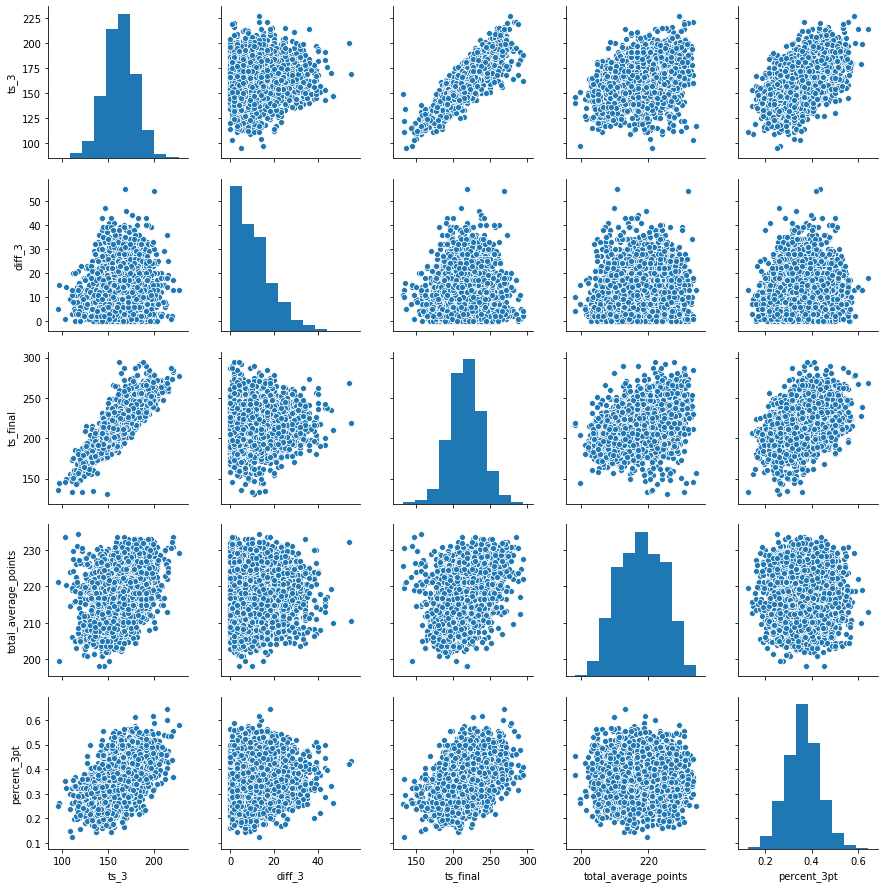

In [222]:
sns.pairplot(df)

,ts_3,diff_3,ts_final,total_average_points,percent_3pt
ts_3,1.000000,0.089972,0.866817,0.386873,0.504678
diff_3,0.089972,1.000000,0.049391,0.034323,0.036293
ts_final,0.866817,0.049391,1.000000,0.384285,0.408654
total_average_points,0.386873,0.034323,0.384285,1.000000,-0.018697
percent_3pt,0.504678,0.036293,0.408654,-0.018697,1.000000


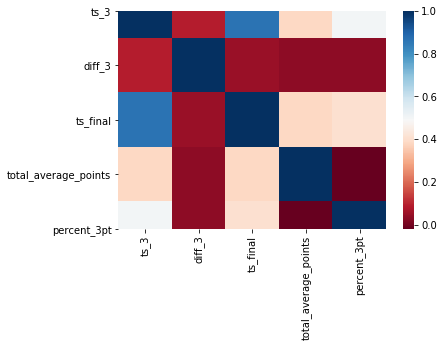

In [223]:
# check for multicolinearity
corr = df.corr()
display(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [224]:
# Heatmap tells us that score_rate, time_remaining, and score_diff are uncorrelated enough to include. 

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(df)


# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)


# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                   1176.399584
ts_3                       4.746245
diff_3                     1.011732
ts_final                   4.088599
total_average_points       1.278395
percent_3pt                1.448774
dtype: float64

In [225]:
# Given all of our variables have low correlation values (well under 5), we can confirm they are okay to be included
desc = df.describe()
desc

,ts_3,diff_3,ts_final,total_average_points,percent_3pt
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,162.983529,10.639059,216.957788,217.862788,0.361429
std,17.115344,8.231476,21.548526,6.630506,0.071834
min,95.000000,0.000000,131.200000,198.100000,0.125000
25%,151.000000,4.000000,203.000000,212.700000,0.312500
50%,163.000000,9.000000,217.000000,217.950000,0.361111
75%,174.000000,15.000000,231.000000,223.100000,0.409091
max,227.000000,55.000000,295.000000,234.250000,0.644444


In [226]:
#df = df[df['diff_1'] < 29]
df = df[df['ts_final'] > 100]
df = df[df['ts_final'] < 300]


In [227]:
#build the model
X = df.drop('ts_final', axis = 1)
Y = df["ts_final"]

#Split data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

# Fit the model
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [228]:
# Print out results of the model
intercept = regression_model.intercept_
coefficent = regression_model.coef_[0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

for coef in zip(X.columns, regression_model.coef_):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 4.293
----------------------------------------------------------------------------------------------------
The Coefficient for ts_3 is 1.1
The Coefficient for diff_3 is -0.078
The Coefficient for total_average_points is 0.19
The Coefficient for percent_3pt is -7.8


In [229]:
Y_predict = regression_model.predict(X_test)

In [230]:
Y_predict

array([200.21763667, 220.83139977, 207.76595732, 208.85156609,
       220.24182555, 204.58015297, 198.29105694, 209.31223309,
       229.97788676, 198.69548278, 209.33477797, 224.4006608 ,
       214.08242788, 200.04538697, 190.98738331, 217.78149087,
       197.24495918, 212.62975331, 215.91737726, 210.39420585,
       201.42084104, 236.07354218, 238.49380379, 241.11447988,
       196.0103073 , 194.52849594, 197.91626678, 192.22477578,
       202.65510099, 216.62597959, 206.49744534, 223.51319664,
       229.86172563, 227.48966845, 197.40754756, 232.94803167,
       206.47526194, 205.63483308, 204.46701601, 231.46745689,
       175.11661968, 206.68533741, 223.76876188, 252.73974233,
       210.4973413 , 197.78553106, 227.011809  , 202.53109377,
       198.42031502, 232.30606684, 188.21362793, 218.91187721,
       215.97827123, 205.61937152, 215.8737803 , 212.72330605,
       223.67692797, 213.93546253, 216.00900158, 206.82718348,
       228.71351608, 213.8044025 , 199.48250008, 205.72

In [231]:
print('Train Score :', regression_model.score(X_train,Y_train))
print('Test Score:', regression_model.score(X_test,Y_test))

Train Score : 0.7570260373133079
Test Score: 0.7448777963655028


In [232]:
# Applying model to be used with the statsmodel package (needs a constant) 
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)


# fit the data
est = model.fit()
est.pvalues

const                   2.027444e-01
ts_3                    0.000000e+00
diff_3                  1.417068e-04
total_average_points    1.910365e-09
percent_3pt             7.939006e-03
dtype: float64

In [233]:
#White's test for heteroscedasticity
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

1.0638362007723358e-06 9.692220682664522e-07
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 1.064e-06
9.446854665410845e-07 9.006980883834562e-07
----------------------------------------------------------------------------------------------------


In [234]:
model = sm.OLS(Y, X2)
est = model.fit()

_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)

1.0638362007723358e-06 9.692220682664522e-07


C:\Users\charl\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:496: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)
C:\Users\charl\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


The lowest p-value found was 0.7417
We fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


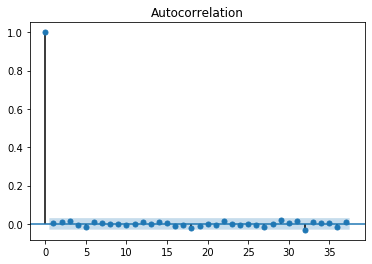

In [235]:
# test for autocorrelation

from statsmodels.stats.stattools import durbin_watson

test_results = diag.acorr_ljungbox(est.resid)
ibvalue, p_val = test_results

if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)
    
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

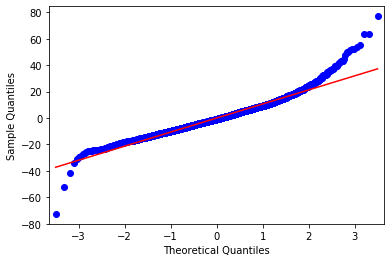

The mean of the residuals is 2.65e-14


In [236]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [237]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.17e+02
MAE 8.16
RMSE 10.8


In [238]:
model_r2 = r2_score(Y_test, Y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.74


In [239]:
est.conf_int()

,0,1
const,-3.850436,18.140144
ts_3,1.060480,1.109480
diff_3,-0.115111,-0.036875
total_average_points,0.112701,0.221603
percent_3pt,-12.641826,-1.904279


In [240]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               ts_final   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     3278.
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        15:40:19   Log-Likelihood:                -16086.
No. Observations:                4250   AIC:                         3.218e+04
Df Residuals:                    4245   BIC:                         3.221e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.1449 

In [219]:
import pickle

# pickle the model
with open('predict_3.sav','wb') as f:
     pickle.dump(regression_model, f)